# Examen parcial 2 (raizes y ~interpolacion)

Mariana Alvarez Acevedo.

cc 1193054974

---


* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 04.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio

Bajo ciertas condiciones, los dispositivos ópticos como los láseres pueden mostrar un comportamiento complejo en el perfil del rayo de luz.


<table><tr>
<td> <img src="nonlinear_behaviour.png" width="600" /> </td>
</tr></table>
 
Para un dispositivo óptico particular que consiste en un medio no lineal dentro de una cavidad óptica, esto sólo ocurre cuando la intensidad I se encuentra dentro de un cierto rango que está dado por la ecuación: 

$$f(x)=(x+1)^2 - c(x-1) < 0 $$

donde $x$ es la intensidad del campo eléctrico y $c$ es la fuerza de la absorción del 
medio no lineal. 

In [1]:
#importamos las librerias
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt


## 1. 
Cree una función llamada `f_cost` que reciba dos parámetros (x,c) y solo devuelva la función f(x) como se mencionó anteriormente.

In [24]:
def f_cost(x, c):

  return ((x+1)**2)-(c*(x-1))


## 2. 
Usando funcion `f_cost` haz un gráfico con cuatro curvas para c=5,10,15,20 y con x entre -10,20 (50 puntos)
* hacer que cada curva sea de un color diferente
* añadir etiquetas

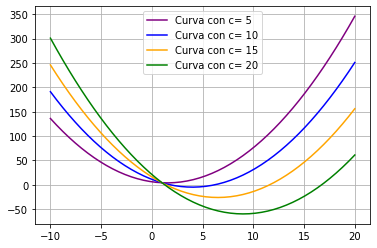

In [68]:
x= np.linspace(-10,20,50)
fig,ax= plt.subplots(1,1)
ax.plot(x, f_cost(x, 5), color="purple", label="Curva con c= 5")
ax.plot(x, f_cost(x, 10), color="blue", label="Curva con c= 10")
ax.plot(x, f_cost(x, 15), color="orange", label="Curva con c= 15")
ax.plot(x, f_cost(x, 20), color="green", label="Curva con c= 20")
ax.legend()
ax.grid()

## 2a. Para cual `c` esta funcion no tiene raices?

In [ ]:
# Para C= 5 la funcion dada no tiene raices.

## 3. 
Cree una función llamada `root_finding()` que devuelva el valor de la raíz (si existiera) para cada parametro `c` (pense `Newton` o `bisecion`). Usando esta funcion vamos a buscar primero raiz izquierda y despues raiz derecha.

In [84]:
def root_finding(f_cost,start,c): 
    try:
        root = optimize.newton(f_cost, start,args=(c,))
    except:
        root=np.nan
    return root

for i in np.linspace(10,20,3):
  root_izq= root_finding(f_cost, 2, i)
  print("La raiz izquierda de c= ", i)
  print(" es", root_izq )

for i in np.linspace(10,20,3):
  root_der= root_finding(f_cost, 50, i)
  print("La raiz derecha de c=", i)
  print(" es", root_der )

La raiz izquierda de c=  10.0
 es 1.7639320225002109
La raiz izquierda de c=  15.0
 es 1.3765246170202043
La raiz izquierda de c=  20.0
 es 1.2540333075851664
La raiz derecha de c= 10.0
 es 6.236067977499791
La raiz derecha de c= 15.0
 es 11.623475382979816
La raiz derecha de c= 20.0
 es 16.74596669241486


## 4a. 
Primero vamos a mirar el comportamiento de raiz de lado izquierda: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `left_roots`

In [69]:
c_vec= np.linspace(5,100,50)

left_roots=[]
start= 2
for c in c_vec:
    try:
        root = root_finding(f_cost,start,c)
    except:
        root=np.nan
        
    left_roots.append(root)



## 4b 
Hacer un gráfico de raíz izquierda vs c

Text(0.5, 1.0, ' raíz izquierda vs c')

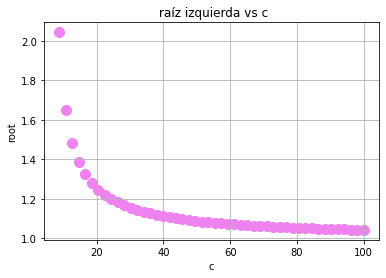

In [75]:
fig,ax = plt.subplots(1,1)
ax.scatter(c_vec,left_roots,s=100,c='violet')
ax.grid()
ax.set_xlabel('c')
ax.set_ylabel('root')
ax.set_title(' raíz izquierda vs c')



## 5a. 
Ahora vamos a mirar el comportamiento de raiz de lado derecha: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `right_roots`.

In [82]:
c_vec= np.linspace(5,100,50)

right_roots=[]
start= 50
for c in c_vec:
    try:
        root = root_finding(f_cost,start,c)
    except:
        root=np.nan
        
    right_roots.append(root)



## 5b
* Hacer un gráfico de raíz derecha vs c

Text(0.5, 1.0, ' raíz derecha vs c')

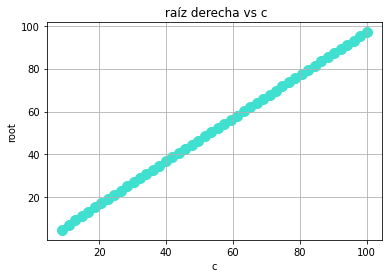

In [83]:
fig,ax = plt.subplots(1,1)
ax.scatter(c_vec,right_roots,s=100,c='turquoise')
ax.grid()
ax.set_xlabel('c')
ax.set_ylabel('root')
ax.set_title(' raíz derecha vs c')





## 6. 
Pregunta:
* este cierto *rango* para cual se obtiene un comportamiento complejo esta convergente o divergente cuando `c` es creciente
* si este rango esta convergiendo, ¿a qué valor?
* si este rango esta divergente, como esta divergente (lineal, cuadrático, diferente)

In [ ]:
# respuesta:
#1)Para la gráfica  de la raiz izquierda, el rango converge a 1. (evidente en la gráfica)
#2)Para la gráfica de la raiz derecha, el rango diverge de forma lineal. (evidente en la gráfica)


# Feedback:

`Correct implementation of the f_cost function + labeled plot 	  (max 2.0p):	2.0p`
`Correct implementation of the root finding function 		       (max 2.0p):	2.0p`
`Correct result of the evolution of the left roots (+ plot)	     (max 2.0p):	2.0p`
`Correct result of the evolution of the right roots (+ plot)	    (max 2.0p):	2.0p`
`Correct conclusion of the range behavious			              (max 2.0p):	2.0p`

`- Total:                                                          (max 10.0p):   10.0p`
`